In [1]:
import pandas as pd

In [53]:
df = pd.read_csv("Open Hours Survey 2018.csv")

In [52]:
#df.columns

In [ ]:
#word of mouth 15
#internet Search 14
# Passerby 41      - most people are just passerbys. We can likely increase our amount of attendees by improving this
# BBP Website 12
#Blog/messageboard/ article 3
#Other 4



In [99]:
age_df = df[["Children's ages, if applicable.","Age appropriate?"]]

In [100]:
#age_df

In [101]:
#age_df = age_df[pd.to_numeric(age_df["Children's ages, if applicable."], errors='coerce').notnull()]

In [102]:
age_df = age_df.replace(["Moderately", "Very", "Extremely"], [1,2,3])

In [103]:
#age_df.groupby("Children's ages, if applicable.", as_index=False).count()

In [104]:
#age_df["Children's ages, if applicable."]=pd.to_numeric(age_df["Children's ages, if applicable."])


In [105]:
#graph_set_up = age_df.groupby("Children's ages, if applicable.", as_index=False).mean().sort_values(by=["Children's ages, if applicable."])


In [106]:
#graph_set_up

In [107]:
#pd.to_numeric(graph_set_up["Children's ages, if applicable."])

In [108]:
#graph_set_up

In [109]:
age_df.loc[df['Children\'s ages, if applicable.'].astype(str).str.contains('mo', case=False), 'Children\'s ages, if applicable.'] = '1'



In [110]:
age_df["Children\'s ages, if applicable."] = age_df["Children\'s ages, if applicable."].str.replace("and", ",")

In [111]:
age_df["Children\'s ages, if applicable."]=age_df["Children\'s ages, if applicable."].str.split(',')

In [112]:
#age_df["Children\'s ages, if applicable."]=age_df["Children\'s ages, if applicable."].str.split('and')

In [113]:
age_df["Children\'s ages, if applicable."]

0                [1]
1                [2]
2          [2, 4, 6]
3                [4]
4                [4]
5               [15]
6                [4]
7             [4, 5]
8             [3, 7]
9                [8]
10               [6]
11            [5, 2]
12               [2]
13            [7, 5]
14           [12, 6]
15               [4]
16            [5, 3]
17            [3, 5]
18               NaN
19               [7]
20            [4, 5]
21               [7]
22               [1]
23            [2, 4]
24         [9, 6, 4]
25            [2, 5]
26           [3, 11]
27            [4, 5]
28            [3, 5]
29               [2]
           ...      
49               [2]
50            [5, 7]
51               [3]
52         [7, 3, 3]
53         [4, 5, 9]
54               [1]
55               [6]
56            [8, 9]
57               [4]
58         [3, 6, 8]
59               [6]
60               NaN
61            [4, 7]
62               [1]
63          [10, 14]
64               [6]
65           

In [115]:
age_df.head()

Children's ages, if applicable.  Age appropriate?
0                             [1]               2.0
1                             [2]               2.0
2                       [2, 4, 6]               3.0
3                             [4]               2.0
4                             [4]               3.0

In [114]:
import numpy as np

In [124]:
age_list  = []
rating_list = []
for index, row in age_df.iterrows():
    try:
        for val in row["Children's ages, if applicable."]:
            age_list.append(val)
            rating_list.append(row['Age appropriate?'])
    except:
        pass

In [127]:
len(age_list)
len(rating_list)

118

In [129]:
graph_df = pd.DataFrame({"Age":age_list, "Rating": rating_list})

In [131]:
graph_df['Age'] = graph_df['Age'].str.extract('(\d+)', expand=False)

In [133]:
graph_df['Age'] = graph_df["Age"].astype(int)

In [152]:
amount_graph = graph_df.groupby("Age", as_index=False).count()

In [158]:
amount_graph

Age  Rating
0     1       6
1     2      15
2     3      12
3     4      19
4     5      17
5     6      18
6     7      10
7     8       6
8     9       6
9    10       2
10   11       2
11   12       1
12   14       1
13   15       1

In [138]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [139]:
sns.set()

In [ ]:
graph_df

In [ ]:
sns.barplot(graph)

In [141]:
grouped_graph_df = graph_df.groupby("Age", as_index=False).mean()

(-0.5, 8.5)

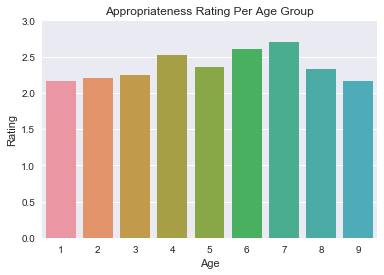

In [175]:
plot = sns.barplot(grouped_graph_df["Age"], grouped_graph_df["Rating"])
plot.set_title("Appropriateness Rating Per Age Group")
axes = plot.axes
axes.set_ylim(0,3)
axes.set_xlim(-0.5,8.5)

Text(0,0.5,'Count')

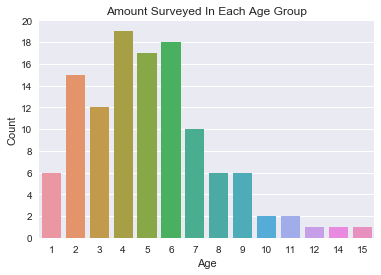

In [179]:
plot = sns.barplot(amount_graph["Age"], amount_graph["Rating"])
plot.set_title("Amount Surveyed In Each Age Group")
plot.set(yticks=range(0,21,2))
axes = plot.axes
axes.set_ylabel("Count")

#axes.set_ylim(0,20)
#axes.set_xlim(-0.5,9.5)

In [66]:
num_list = []
for num in list(age_df["Children's ages, if applicable."]):
    num = str(num)
    for nums in num.replace('and', ',').split(','):
        num_list.append(nums)
    #if "mo" in num:
        

In [6]:
final_num_list = []
for num in num_list:
    if "mo" in num:
        final_num_list.append(1)
    else:
        try:
            num = int(num)
            final_num_list.append(num) 
        except:
            pass
        

In [7]:
final_num_list

[1,
 2,
 2,
 4,
 6,
 4,
 4,
 15,
 4,
 4,
 5,
 3,
 7,
 8,
 6,
 5,
 2,
 2,
 7,
 5,
 12,
 6,
 4,
 5,
 3,
 3,
 5,
 7,
 4,
 5,
 7,
 1,
 2,
 4,
 9,
 6,
 4,
 2,
 5,
 3,
 11,
 4,
 5,
 3,
 5,
 2,
 6,
 1,
 4,
 5,
 7,
 2,
 4,
 4,
 10,
 11,
 8,
 8,
 3,
 9,
 5,
 9,
 6,
 6,
 6,
 7,
 2,
 6,
 3,
 2,
 2,
 2,
 5,
 7,
 3,
 7,
 3,
 3,
 4,
 5,
 9,
 1,
 6,
 8,
 9,
 4,
 3,
 6,
 8,
 6,
 4,
 7,
 1,
 4,
 10,
 14,
 6,
 6,
 6,
 5,
 5,
 2,
 7,
 5,
 4,
 2,
 6,
 5,
 9,
 6,
 6,
 8,
 6,
 3,
 4,
 6,
 4,
 2]